In [5]:
import pandas as pd
import os
#https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af
#https://github.com/JustAnotherArchivist/snscrape

# Scrape tweets and download

In [6]:
def download_tweets(user, num_tweets=100):
    os.system("snscrape --jsonl --max-results {num_tweets} twitter-search 'from:{user}'> tweets\\{user}-{num_tweets}.json".format(user=user, num_tweets=num_tweets))
#download_tweets(user="ZelenskyyUa", num_tweets=1000)
#download_tweets(user="FedorovMykhailo", num_tweets=1000)

In [7]:
def read_tweets():
    # Reads the json generated from the CLI commands above and creates a pandas dataframe
    tweets_df = pd.read_json("C:\\Users\\adder\\Documents\\Minerva\\CCP Ukraine\\social-media-ukraine\\tweets\\ZelenskyyUa-1000.json", lines=True)
    print(tweets_df.columns)
    print(len(tweets_df))
    long_sentence = ""
    for row in range(len(tweets_df)):
        long_sentence += tweets_df.iloc[row].content
        if tweets_df.iloc[row].hashtags is not None:
            print(tweets_df.iloc[row])
        # print()
    # for row in range(len(tweets_df)):
    #     print(tweets_df[row].content)
    return long_sentence


C:\Users\adder\Documents\Minerva\CCP Ukraine\social-media-ukraine
871
1668804104
(600, 43)


In [ ]:
### Load Federov Tweets
f = open("tweets\\0-3200FedorovMykhailo.csv", encoding='utf-8')
print(len(f.readlines()))
tweets_df = pd.read_csv("tweets\\0-3200FedorovMykhailo.csv", encoding="utf-8")
tweets_df = pd.concat([tweets_df, pd.read_csv("tweets\\3200-6400FedorovMykhailo.csv", encoding="utf-8")], axis=0)
tweets_df = pd.concat([tweets_df, pd.read_csv("tweets\\6400-9600FedorovMykhailo.csv", encoding="utf-8")], axis=0)
tweets_df = pd.concat([tweets_df, pd.read_csv("tweets\\9600-12800FedorovMykhailo.csv", encoding="utf-8")], axis=0)
tweets_df = pd.concat([tweets_df, pd.read_csv("tweets\\12800-16000FedorovMykhailo.csv", encoding="utf-8")], axis=0)
tweets_df = pd.concat([tweets_df, pd.read_csv("tweets\\16000-19200FedorovMykhailo.csv", encoding="utf-8")], axis=0)

In [ ]:
### Load Zelenskyy Tweets
#tweets_df = pd.read_csv("tweets\\0-3200ZelenskyyUa.csv", encoding="utf-8")


In [8]:
## lots of different languages, but mostly english and ekrainian

print(len(tweets_df))
tweets_df.iloc[1]['lang']
tweets_df.iloc[1]['full_text']
print(set(tweets_df['lang']))

print(tweets_df.loc[tweets_df['lang'] == 'it'])
all_langs = set(tweets_df['lang'])
for lang in all_langs:
    print(lang, len(tweets_df.loc[tweets_df['lang'] == lang]))

600
{'zxx', 'qme', 'qam', 'in', 'fr', 'ru', 'uk', 'zh', 'pl', 'en', 'art', 'und', 'ro'}
Empty DataFrame
Columns: [created_at, id, id_str, full_text, truncated, display_text_range, entities, source, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, geo, coordinates, place, contributors, retweeted_status, is_quote_status, retweet_count, favorite_count, favorited, retweeted, lang, possibly_sensitive, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status, text, favorited_by, scopes, display_text_width, quote_count, timestamp_ms, reply_count, filter_level, metadata, query, withheld_scope, withheld_copyright, withheld_in_countries, possibly_sensitive_appealable]
Index: []

[0 rows x 43 columns]
zxx 8
qme 1
qam 1
in 1
fr 1
ru 2
uk 20
zh 1
pl 1
en 559
art 1
und 3
ro 1


# Separate into ukrainian vs english tweets

In [9]:
# all tweets come from the iphone app or the twitter web app mobile.twitter.com
print(set(tweets_df.columns))

print(set(tweets_df["source"]))

en, uk = tweets_df.loc[tweets_df['lang'] == 'en'], tweets_df.loc[tweets_df['lang'] == 'uk']
# web = tweets_df.loc[tweets_df['source'] == '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>']
# iphone = tweets_df.loc[tweets_df['source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>']
# print(web.head())
# print(iphone.head())

{'in_reply_to_status_id_str', 'geo', 'quoted_status', 'is_quote_status', 'favorited_by', 'withheld_scope', 'created_at', 'withheld_copyright', 'quoted_status_id', 'source', 'lang', 'contributors', 'favorite_count', 'quote_count', 'display_text_width', 'retweeted', 'in_reply_to_user_id_str', 'in_reply_to_status_id', 'metadata', 'display_text_range', 'retweet_count', 'withheld_in_countries', 'id', 'possibly_sensitive_appealable', 'place', 'filter_level', 'query', 'coordinates', 'quoted_status_id_str', 'full_text', 'timestamp_ms', 'retweeted_status', 'entities', 'truncated', 'reply_count', 'possibly_sensitive', 'id_str', 'favorited', 'scopes', 'quoted_status_permalink', 'in_reply_to_screen_name', 'text', 'in_reply_to_user_id'}
{'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>'}


# Remove stop words and tokenize

In [10]:
# import nltk
# nltk.download('nps_chat')
# nltk.download('webtext')
from nltk.tokenize import word_tokenize
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#tweets_df = pd.read_json("tweets\\{user}-1000.json".format(user="ZelenskyyUa"), lines=True)

def get_uk_stop():
    f = open("stopwords_ua.txt", encoding="utf8")
    words = f.read().split("\n")
    return words

def tokenize_remove_stop(df):
    """
    Returns a list of tokens that are not stop words in english or ukrainian
    """
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'amp'])
    stop_words.extend(get_uk_stop())

    big_string = " ".join(df.full_text)
    big_string = big_string.lower()
    big_string = re.sub("[^\w\s]", "", big_string)
    tokenized = word_tokenize(big_string)
    removed_stop_words = [i for i in tokenized if i not in stop_words]
    return removed_stop_words

# print(all_web_content)
# print("\n\n\n")

en_tokens = tokenize_remove_stop(en)
uk_tokens = tokenize_remove_stop(uk)
# tokenized_web = tokenize_remove_stop(web)
# tokenized_iphone = tokenize_remove_stop(iphone)


# from googletrans import Translator
# translator = Translator()
# translator.translate('Продовжив діалог із директоркою МВФ @KGeorgiev', src='uk', dest='en')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Frequency Distribution Plots for web/iphone

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


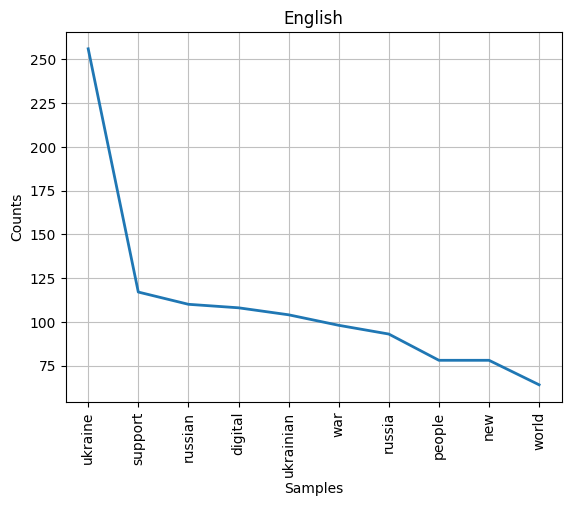

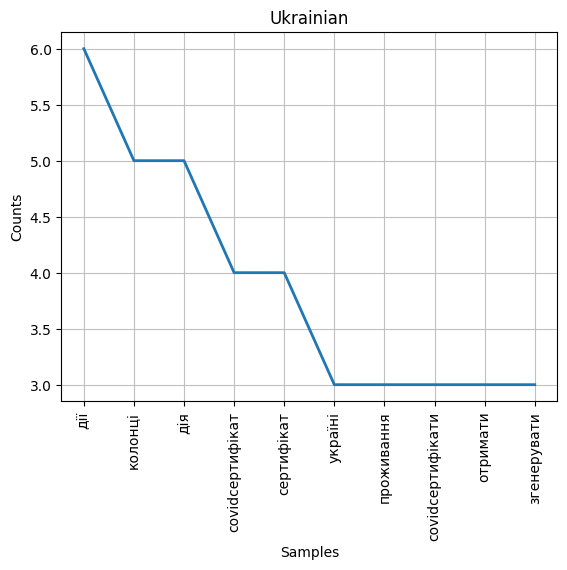

<AxesSubplot:title={'center':'Ukrainian'}, xlabel='Samples', ylabel='Counts'>

In [11]:
from nltk.book import FreqDist
freqDist = FreqDist(en_tokens)
freqDist.plot(10, title="English")
freqDist = FreqDist(uk_tokens)
freqDist.plot(10, title="Ukrainian")

# Word clouds for English and Ukrainian

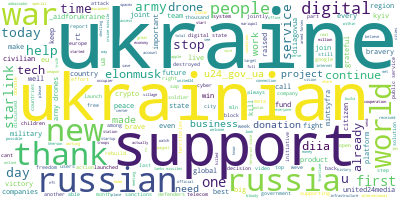

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(" ".join(en_tokens))# Visualize the word cloud
wordcloud.to_image()



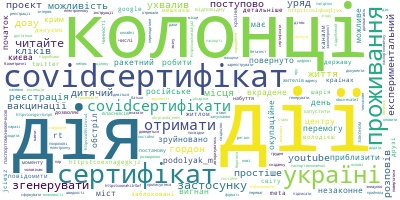

In [13]:
wordcloud.generate(" ".join(uk_tokens))# Visualize the word cloud
wordcloud.to_image()

# Post frequencies

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status',
       'text', 'favorited_by', 'scopes', 'display_text_width', 'quote_count',
       'timestamp_ms', 'reply_count', 'filter_level', 'metadata', 'query',
       'withheld_scope', 'withheld_copyright', 'withheld_in_countries',
       'possibly_sensitive_appealable'],
      dtype='object')
   created_at            id               id_str  \
0  1668804104  1.593706e+18  1593706040444469248   
1  1668794867  1.593667e+18  1593667298904231937   
2  1

Text(0, 0.5, 'Number of tweets')

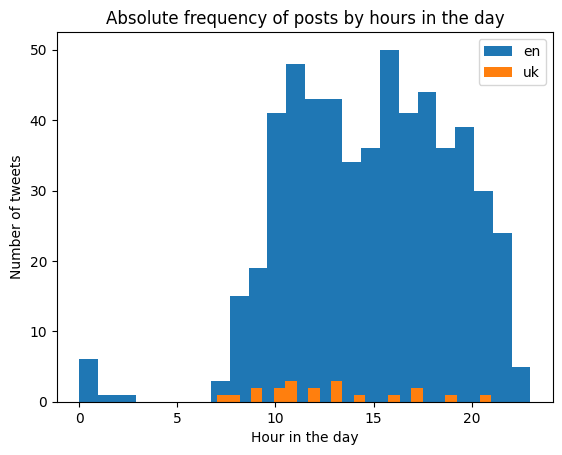

In [14]:
from datetime import datetime, timezone, timedelta
from matplotlib import pyplot as plt
import datetime
def get_hour_frequency_plot(df):
    hours_frequency = []
    for time in df.created_at:
        hour = datetime.datetime.fromtimestamp(time, timezone(timedelta(hours=2))).hour
        hours_frequency.append(hour)
    return plt.hist(hours_frequency, bins=24)

print(en.columns)
print(en.head())
get_hour_frequency_plot(en)
get_hour_frequency_plot(uk)
plt.legend(["en", "uk"])
plt.title("Absolute frequency of posts by hours in the day")
plt.xlabel("Hour in the day")
plt.ylabel("Number of tweets")

# Topic modelling
The section below does the topic modelling from https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

It makes a .html file that allows you to view the topics

In [19]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(doc):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words]]
# data = papers.paper_text_processed.values.tolist()
# data_words = list(sent_to_words(data))
data_words = [en_tokens]

import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

print("UP TO MODEL")
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics, workers=1)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
print("up to visualize")
import os
import pyLDAvis.gensim_models
import pickle
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join("C:\\Users\\adder\\Documents\\Minerva\\CCP Ukraine\\social-media-ukraine\\topic_modelling_output\\" + str(num_topics))

print(LDAvis_data_filepath)
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, str(num_topics) +'.html')
    LDAvis_prepared

[(0, 2), (1, 1), (2, 11), (3, 5), (4, 14), (5, 4), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1)]
UP TO MODEL
[(0,
  '0.011*"ukraine" + 0.006*"russia" + 0.005*"ukrainian" + 0.005*"support" + '
  '0.005*"war" + 0.005*"digital" + 0.005*"russian" + 0.005*"people" + '
  '0.005*"new" + 0.004*"world"'),
 (1,
  '0.016*"ukraine" + 0.007*"war" + 0.007*"ukrainian" + 0.007*"digital" + '
  '0.007*"russian" + 0.006*"support" + 0.005*"russia" + 0.005*"people" + '
  '0.005*"army" + 0.004*"new"'),
 (2,
  '0.018*"ukraine" + 0.009*"support" + 0.008*"russian" + 0.007*"digital" + '
  '0.006*"ukrainian" + 0.006*"war" + 0.006*"russia" + 0.005*"new" + '
  '0.004*"people" + 0.004*"ukrainians"')]
up to visualize
C:\Users\adder\Documents\Minerva\CCP Ukraine\social-media-ukraine\3


C:\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# Vader Sentiment Analysis
https://github.com/cjhutto/vaderSentiment#about-the-scoring
    positive sentiment: compound score >= 0.05
    neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
    negative sentiment: compound score <= -0.05


In [31]:
from nltk import tokenize
#nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentences = []
for tweet_text in en["full_text"]:
    lines_list = tokenize.sent_tokenize(tweet_text)
    sentences.extend(lines_list)
compound_scores = []
for sentence in sentences:
    sid = SentimentIntensityAnalyzer()
    # print(sentence)
    ss = sid.polarity_scores(sentence)
    compound_scores.append(ss['compound'])
    # for k in sorted(ss):
    #     print('{0}: {1}, '.format(k, ss[k]), end='')
    # print("\n------")


C:\Users\adder\AppData\Local\Temp\ipykernel_12420\53799306.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(en["full_text"][:10])


0    RT @USAmbKyiv: From defending Ukraine with the...
1    Met with @USEmbassyKyiv Ambassador Bridget Bri...
2    Heartbreaking photo from Bakhmut, Donetsk regi...
3    Despite cruise missiles up in the sky &amp; ne...
4    Meanwhile another massive missile attack. Morn...
5    The best way to fight Russian terror — ensure ...
6    85 cruise missiles in the last few hours have ...
7    Bracelets from the last batch of steel from le...
8    Kherson — online. Ukrainian Army liberated ter...
9    Happy Independence Day to our Polish friends! ...
Name: full_text, dtype: object


(array([  50.,   96.,   99.,   93.,   44., 1020.,  130.,  289.,  204.,
          90.]),
 array([-0.9559 , -0.76589, -0.57588, -0.38587, -0.19586, -0.00585,
         0.18416,  0.37417,  0.56418,  0.75419,  0.9442 ]),
 <BarContainer object of 10 artists>)

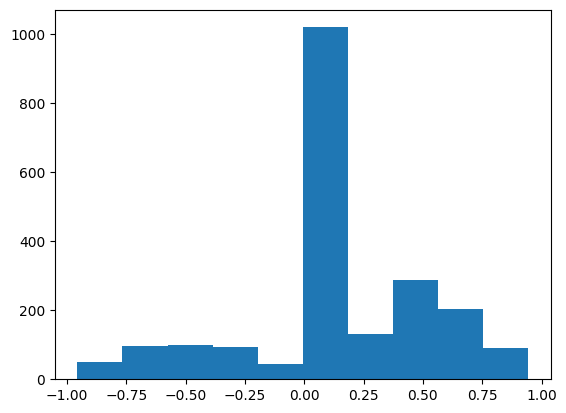

In [37]:
from matplotlib import pyplot as plt

## plot frequency of compound scores
plt.hist(compound_scores, bins=10)